In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import uuid

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from astropy import units as u
from astropy.constants import R_earth
from astropy.coordinates import SkyCoord, Distance, get_sun
from astropy.time import Time, TimeDelta
from pandoravisibility import Visibility, analyze_yearly_visibility, plot_yearly_visibility, plot_visibility_summary

from astropy.visualization import time_support

from commissioningscheduler.roll import calculate_roll

In [3]:
# Set options to display all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Set max column width to None to prevent truncation of long cell content
pd.set_option('display.max_colwidth', None)

In [4]:
line1 = "1 99152U 80229J   26017.75114583  .00000000  00000-0  37770-3 0    07"
line2 = "2 99152  97.8003  18.8171 0003829 259.1072 192.9926 14.87777498    09"

In [5]:
vis = Visibility(line1, line2)

In [6]:
# Define start and stop times
tstart = Time("2026-01-20T13:52:00.000")
tstop = Time("2026-01-21T05:55:00.000")  # Example stop time

# Calculate times with a step of 1 minute
deltas = np.arange(0, (tstop - tstart).to_value(u.min), 1) * u.min
times = tstart + TimeDelta(deltas)

# Use these times with your Visibility module
state = vis.get_state(times)

Let's try a primary target first.

In [7]:
# HD 73583 from Gaia DR3:
target_coord = SkyCoord(
    ra=129.68829349261745 * u.deg,
    dec=-13.256521320044767 * u.deg,
    pm_ra_cosdec=-63.831047412374296 * u.mas / u.year,
    pm_dec=38.481540014954675 * u.mas / u.year,
    obstime=Time.strptime("2016", "%Y"),
    distance=Distance(parallax=31.656880455652196 * u.mas, allow_negative=True),
    radial_velocity=20.455652 * u.km / u.s,
).apply_space_motion(Time.now())

# calculate the visibilities of the target at our specified times
targ_vis = vis.get_visibility(target_coord, times)

print(target_coord.ra.degree)
print(target_coord.dec.degree)

129.68811032611129
-13.256413837624818


Now an occultation target.

In [8]:
# TOI-431 from Gaia DR3:
occ_coord = SkyCoord(
    ra=83.26925287515645 * u.deg,
    dec=-26.72384884501141 * u.deg,
    pm_ra_cosdec=16.88616198889951 * u.mas / u.year,
    pm_dec=150.77881187412743 * u.mas / u.year,
    obstime=Time.strptime("2016", "%Y"),
    distance=Distance(parallax=30.65166867430715 * u.mas, allow_negative=True),
    radial_velocity=48.664806 * u.km / u.s,
).apply_space_motion(Time.now())

# calculate the visibilities of the target at our specified times
occ_vis = vis.get_visibility(occ_coord, times)

print(occ_coord.ra.degree)
print(occ_coord.dec.degree)

83.26930567944952
-26.72342771005722


In [9]:
print(len(times))
print(len(targ_vis))

964
964


In [10]:
df = pd.DataFrame({'time': times, 'HD 73583': targ_vis, 'TOI-431': occ_vis})

In [11]:
print(df)

                        time  HD 73583  TOI-431
0    2026-01-20T13:52:00.000     False    False
1    2026-01-20T13:53:00.000     False    False
2    2026-01-20T13:54:00.000     False    False
3    2026-01-20T13:55:00.000     False    False
4    2026-01-20T13:56:00.000     False    False
5    2026-01-20T13:57:00.000     False    False
6    2026-01-20T13:58:00.000     False    False
7    2026-01-20T13:59:00.000     False    False
8    2026-01-20T14:00:00.000      True    False
9    2026-01-20T14:01:00.000      True    False
10   2026-01-20T14:02:00.000      True    False
11   2026-01-20T14:03:00.000      True    False
12   2026-01-20T14:04:00.000      True    False
13   2026-01-20T14:05:00.000      True    False
14   2026-01-20T14:06:00.000      True    False
15   2026-01-20T14:07:00.000      True    False
16   2026-01-20T14:08:00.000      True    False
17   2026-01-20T14:09:00.000      True    False
18   2026-01-20T14:10:00.000      True    False
19   2026-01-20T14:11:00.000      True  

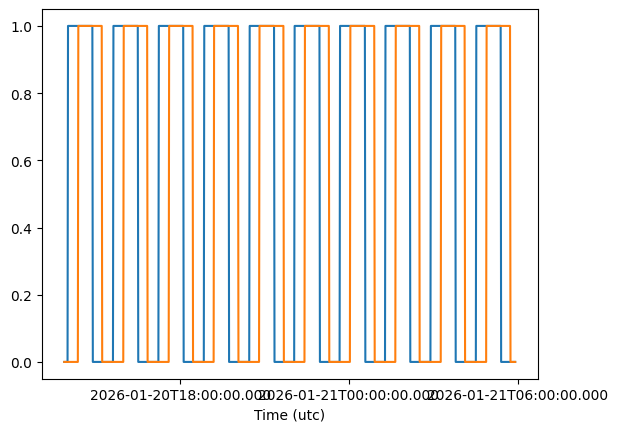

In [12]:
with time_support():
    plt.plot(times, targ_vis)
    plt.plot(times, occ_vis)
    plt.show();

In [13]:
str(uuid.uuid4())

'2d435f54-dda8-4e0f-be3d-4e8a9319f893'

In [14]:
# HD 73583
calculate_roll(
    ra=129.68811035673298,
    dec=-13.256413855593706,
    obs_time=Time('2026-01-21T05:13:00Z', format='isot', scale='utc')
)

np.float64(11.304820234545348)

In [15]:
# TOI-431
calculate_roll(
    ra=83.26925287515645,
    dec=-26.72384884501141,
    obs_time=Time('2026-01-21T05:23:00Z', format='isot', scale='utc')
)

np.float64(316.3537463082805)

Passes on Jan 20, 2026:

In [ ]:
PANDORA	Svalbard Station	SG127	2026-01-20T13:41:30Z	2026-01-20T13:51:00Z	570	N/A	-1
PANDORA	Svalbard Station	SG127	2026-01-20T15:17:50Z	2026-01-20T15:27:10Z	560	N/A	-1
PANDORA	Svalbard Station	SG127	2026-01-20T16:55:00Z	2026-01-20T17:03:20Z	500	N/A	-1
PANDORA	Troll Station	TR20	2026-01-20T17:51:50Z	2026-01-20T18:00:20Z	510	N/A	-1
PANDORA	Troll Station	TR20	2026-01-20T19:27:50Z	2026-01-20T19:36:30Z	520	N/A	-1
PANDORA	Troll Station	TR20	2026-01-20T21:03:40Z	2026-01-20T21:11:30Z	470	N/A	-1
PANDORA	Troll Station	TR20	2026-01-21T00:13:40Z	2026-01-21T00:21:00Z	440	N/A	-1
PANDORA	Troll Station	TR20	2026-01-21T01:47:30Z	2026-01-21T01:56:30Z	540	N/A	-1
PANDORA	Svalbard Station	SG127	2026-01-21T02:43:00Z	2026-01-21T02:50:00Z	420	N/A	-1
PANDORA	Troll Station	TR20	2026-01-21T03:22:50Z	2026-01-21T03:32:20Z	570	N/A	-1
PANDORA	Svalbard Station	SG127	2026-01-21T04:19:10Z	2026-01-21T04:28:00Z	530	N/A	-1
PANDORA	Troll Station	TR20	2026-01-21T04:59:20Z	2026-01-21T05:08:20Z	540	N/A	-1
PANDORA	Svalbard Station	SG127	2026-01-21T05:55:20Z	2026-01-21T06:04:50Z	570	N/A	-1

### Testing 3I/ATLAS

In [26]:
# Define start and stop times
tstart = Time("2026-01-21T19:50:00.000")
tstop = Time("2026-01-21T21:30:00.000")  # Example stop time

# Calculate times with a step of 1 minute
deltas = np.arange(0, (tstop - tstart).to_value(u.min), 1) * u.min
times = tstart + TimeDelta(deltas)

# Use these times with your Visibility module
state = vis.get_state(times)

3I/ATLAS start RA/Dec

In [32]:
# 3I/ATLAS from JPL Horizons
target_coord = SkyCoord(
    ra=124.45677 * u.deg,
    dec=17.25543 * u.deg,
)

# calculate the visibilities of the target at our specified times
start_vis = vis.get_visibility(target_coord, times)

print(target_coord.ra.degree)
print(target_coord.dec.degree)

124.45677
17.25543


3I/ATLAS end RA/Dec

In [33]:
# 3I/ATLAS from JPL Horizons
target_coord = SkyCoord(
    ra=124.45089 * u.deg,
    dec=17.25657 * u.deg,
)

# calculate the visibilities of the target at our specified times
end_vis = vis.get_visibility(target_coord, times)

print(target_coord.ra.degree)
print(target_coord.dec.degree)

124.45089
17.25657


In [34]:
df_comet = pd.DataFrame({'time': times, 'start': start_vis, 'end': end_vis})

In [35]:
print(df_comet)

                        time  start    end
0    2026-01-21T19:50:00.000  False  False
1    2026-01-21T19:51:00.000  False  False
2    2026-01-21T19:52:00.000  False  False
3    2026-01-21T19:53:00.000  False  False
4    2026-01-21T19:54:00.000  False  False
5    2026-01-21T19:55:00.000  False  False
6    2026-01-21T19:56:00.000  False  False
7    2026-01-21T19:57:00.000  False  False
8    2026-01-21T19:58:00.000  False  False
9    2026-01-21T19:59:00.000  False  False
10   2026-01-21T20:00:00.000  False  False
11   2026-01-21T20:01:00.000  False  False
12   2026-01-21T20:02:00.000  False  False
13   2026-01-21T20:03:00.000  False  False
14   2026-01-21T20:04:00.000  False  False
15   2026-01-21T20:05:00.000  False  False
16   2026-01-21T20:06:00.000  False  False
17   2026-01-21T20:07:00.000  False  False
18   2026-01-21T20:08:00.000  False  False
19   2026-01-21T20:09:00.000  False  False
20   2026-01-21T20:10:00.000  False  False
21   2026-01-21T20:11:00.000  False  False
22   2026-0

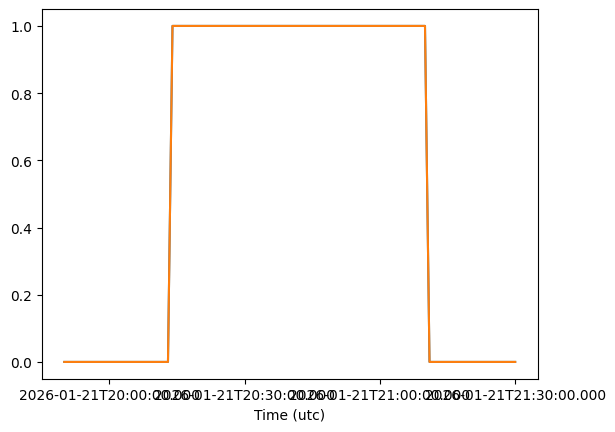

In [36]:
with time_support():
    plt.plot(times, start_vis)
    plt.plot(times, end_vis)
    plt.show();

In [37]:
# 3I/ATLAS
calculate_roll(
    ra=124.45383,
    dec=17.25600,
    obs_time=Time('2026-01-21T20:42:00Z', format='isot', scale='utc')
)

np.float64(15.514508206464008)